# Titanic Dataset Analysis – Assignment 1

This notebook analyzes the Titanic dataset to answer a series of statistical
questions. The dataset is available at: https://www.kaggle.com/c/titanic/data

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
sns.set(style="whitegrid")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
!ls "/content/drive/My Drive/Colab Notebooks/KızBasına_Odevler/odev1/Titanic_dataset.csv"

'/content/drive/My Drive/Colab Notebooks/KızBasına_Odevler/odev1/Titanic_dataset.csv'


In [14]:
file_path = "/content/drive/My Drive/Colab Notebooks/KızBasına_Odevler/odev1/Titanic_dataset.csv"
data = pd.read_csv(file_path)

In [20]:
df=data.copy()

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df.shape

(891, 12)

In [23]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [24]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]>

## 1. Average age of the passengers who died in the accident.

We should take the passengers who did not survive (Survived == 0).


In [49]:
dead_passengers= df[df['Survived']==0]["Age"].mean()

In [41]:
print(f"Average age of passengers who died: {dead_passengers:.2f} years")

Average age of passengers who died: 30.63 years


## 2. Average and median ticket fare of the passengers who died in the accident.

In [47]:
dead = df[df["Survived"] == 0]
dead_mean= dead["Fare"].mean()
dead_median= dead["Fare"].median()

print(f"Average fare (dead): ${dead_mean:.2f}")
print(f"Median fare (dead): ${dead_median:.2f}")

Average fare (dead): $22.12
Median fare (dead): $10.50


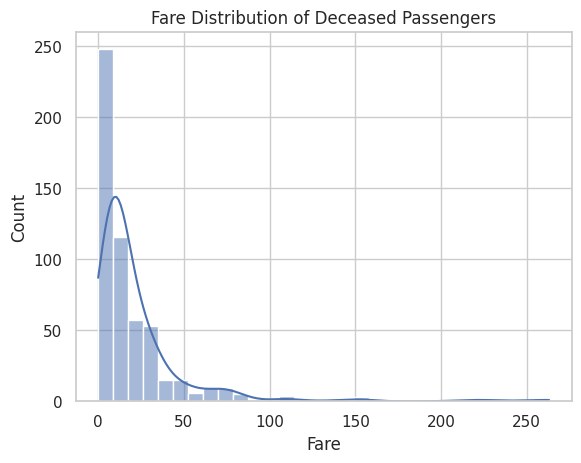

In [50]:
# Visualize fare distribution of deceased
sns.histplot(dead["Fare"], kde=True, bins=30)
plt.title("Fare Distribution of Deceased Passengers")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

Most passengers who died paid lower fares, though there were outliers with higher fares.

## 3. Average age of the male passengers who died in the accident.


In [51]:
dead_men = df[(df["Survived"] == 0) & (df["Sex"] == "male")]
avg_age_dead_men = dead_men["Age"].mean()

print(f"Average age of deceased men: {avg_age_dead_men:.2f} years")

Average age of deceased men: 31.62 years


## 4. Average age of the **female** passengers who died in the accident.


In [52]:
dead_women = df[(df["Survived"] == 0) & (df["Sex"] == "female")]
avg_age_dead_women= dead_women["Age"].mean()

print(f"Average age of deceased women: {avg_age_dead_women:.2f} years")

Average age of deceased women: 25.05 years


/tmp/ipython-input-53-422652335.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=[avg_age_dead_men, avg_age_dead_women], palette='pastel')


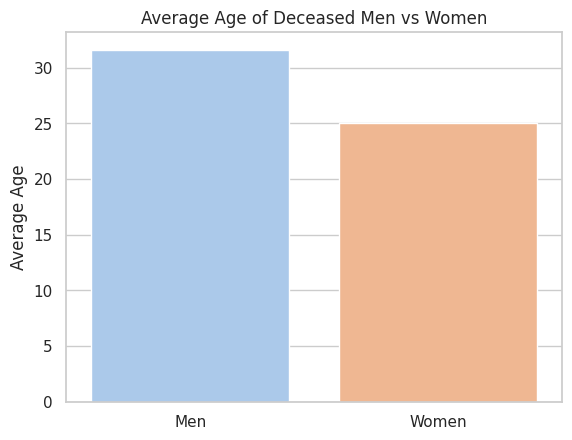

In [53]:
# Compare them visually
sns.barplot(data=[avg_age_dead_men, avg_age_dead_women], palette='pastel')
plt.xticks([0, 1], ["Men", "Women"])
plt.ylabel("Average Age")
plt.title("Average Age of Deceased Men vs Women")
plt.show()

Deceased women were on average younger than deceased men.

## 5. Average age of the passengers who survived the accident.



In [55]:
survivors = df[df["Survived"] == 1]
avg_age_survivors = survivors["Age"].mean()

print(f"Average age of survivors: {avg_age_survivors:.2f} years")

Average age of survivors: 28.34 years


## 6. Average ticket fare of the passengers who survived the accident.


In [56]:
avg_fare_survivors = survivors["Fare"].mean()
print(f"Average fare of survivors: ${avg_fare_survivors:.2f}")

Average fare of survivors: $48.40


/tmp/ipython-input-57-2379858926.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survived", y="Fare", data=df, palette="Set2")


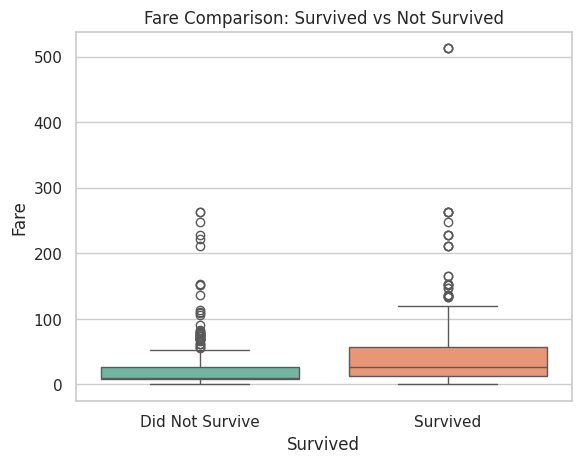

In [57]:
# Compare survivor vs non-survivor fares
sns.boxplot(x="Survived", y="Fare", data=df, palette="Set2")
plt.xticks([0, 1], ["Did Not Survive", "Survived"])
plt.title("Fare Comparison: Survived vs Not Survived")
plt.show()

Survivors tended to have paid higher fares on average, suggesting class may have played a role.

## 7. Total number of passengers who survived the accident.


In [58]:
total_survivors = len(survivors)
print(f"Total number of survivors: {total_survivors}")

Total number of survivors: 342


## 8. Median ticket fare of passengers younger than 10 years old.


In [59]:
children = df[df["Age"] < 10]
median_fare_children = children["Fare"].median()


print(f"Median fare of passengers under 10: ${median_fare_children:.2f}")

Median fare of passengers under 10: $27.00


## 9. Compare mean and median fares by class


In [60]:
fare_stats_by_class = df.groupby("Pclass")["Fare"].agg(["mean", "median"])
print(fare_stats_by_class)

             mean   median
Pclass                    
1       84.154687  60.2875
2       20.662183  14.2500
3       13.675550   8.0500


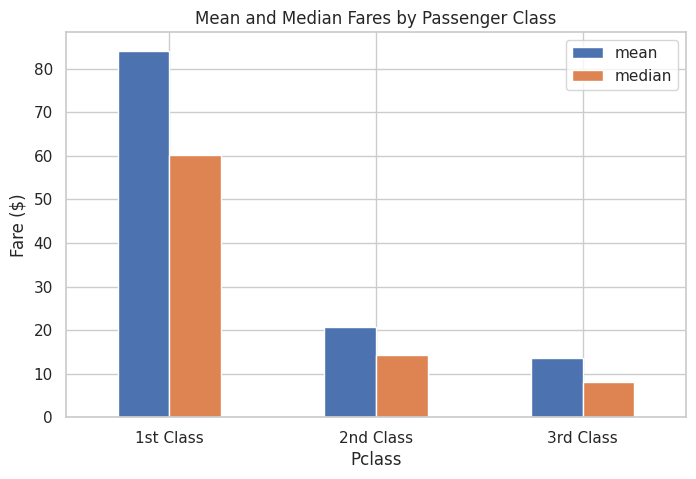

In [61]:
fare_stats_by_class.plot(kind='bar', figsize=(8, 5))
plt.title("Mean and Median Fares by Passenger Class")
plt.ylabel("Fare ($)")
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'], rotation=0)
plt.show()

As expected, higher classes paid significantly more for tickets.

## 10. Compare the death rate (proportion) of male and female passengers.


In [38]:
# Total passengers by gender
total_men = len(df[df["Sex"] == "male"])
total_women = len(df[df["Sex"] == "female"])

# Death count by gender
dead_men_count = len(df[(df["Sex"] == "male") & (df["Survived"] == 0)])
dead_women_count = len(df[(df["Sex"] == "female") & (df["Survived"] == 0)])

# Death ratios
dead_men_ratio = dead_men_count / total_men
dead_women_ratio = dead_women_count / total_women

dead_men_ratio, dead_women_ratio


(0.8110918544194108, 0.25796178343949044)

/tmp/ipython-input-62-1631493835.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Men", "Women"], y=[dead_men_ratio, dead_women_ratio], palette="coolwarm")


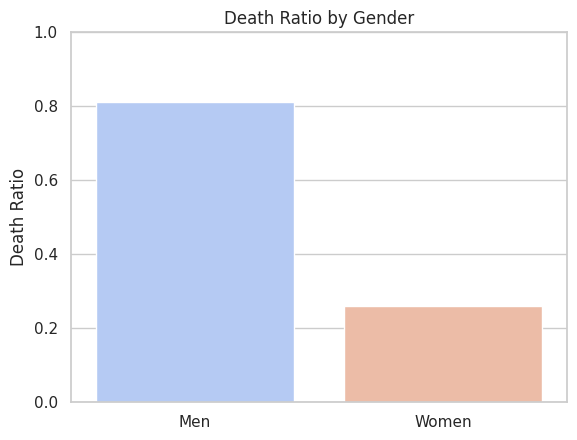

In [62]:
# Bar plot for death ratio
sns.barplot(x=["Men", "Women"], y=[dead_men_ratio, dead_women_ratio], palette="coolwarm")
plt.ylabel("Death Ratio")
plt.title("Death Ratio by Gender")
plt.ylim(0, 1)
plt.show()

The death rate for men was significantly higher than for women, showing that women had a better chance of survival.